Flanella Joevita Vanling - 220711706

Kelompok H2O

Topik : Klasifikasi jenis jamur

VGG-16

In [1]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as pyplot

data_dir = r"D:\Kuliah\SEM 5\ml\UAS\UASSSSS\datasetUASML\train_data"
data = tf.keras.utils.image_dataset_from_directory(data_dir, seed = 123, image_size=(224,224), batch_size=32)
print(data.class_names)

class_names = data.class_names

Found 300 files belonging to 3 classes.
['JamurKuping', 'JamurReishi', 'JamurShitake']


In [2]:
img_size = 224
batch = 32

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
)

Found 300 files belonging to 3 classes.


In [3]:
train_split = 0.8
validation_split = 0.1
test_split = 0.1

total_count = len(dataset)

train_count = int(total_count * train_split)
val_count = int(total_count * validation_split)
test_count = total_count - train_count - val_count  

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)
print("Test Images:", test_count)

train_ds = dataset.take(train_count)  
remaining_ds = dataset.skip(train_count)  

val_ds = remaining_ds.take(val_count)  
test_ds = remaining_ds.skip(val_count) 

Total Images: 10
Train Images: 8
Validation Images: 1
Test Images: 1


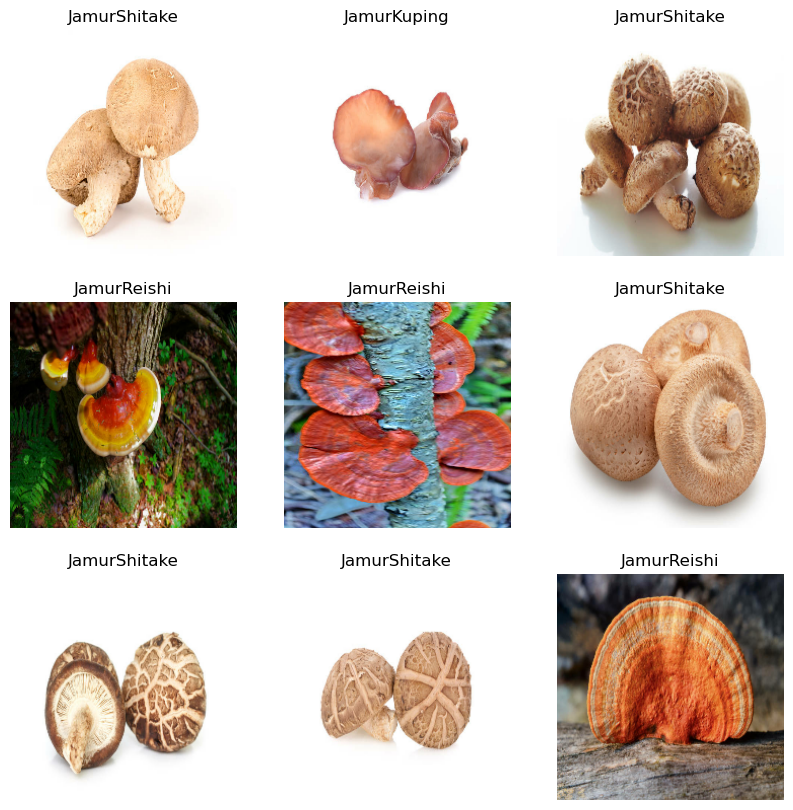

In [4]:
import matplotlib.pyplot as plt

def visualize_images(dataset, class_names, num_images=9, img_size=(10, 10)):
    plt.figure(figsize=img_size)
    for images, labels in dataset.take(1):  
        for i in range(num_images):
            plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])
            plt.axis('off')
    plt.show()

visualize_images(train_ds, class_names, num_images=9, img_size=(10, 10))


Found 300 files belonging to 3 classes.
Using 240 files for training.
Found 300 files belonging to 3 classes.
Using 60 files for validation.


c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


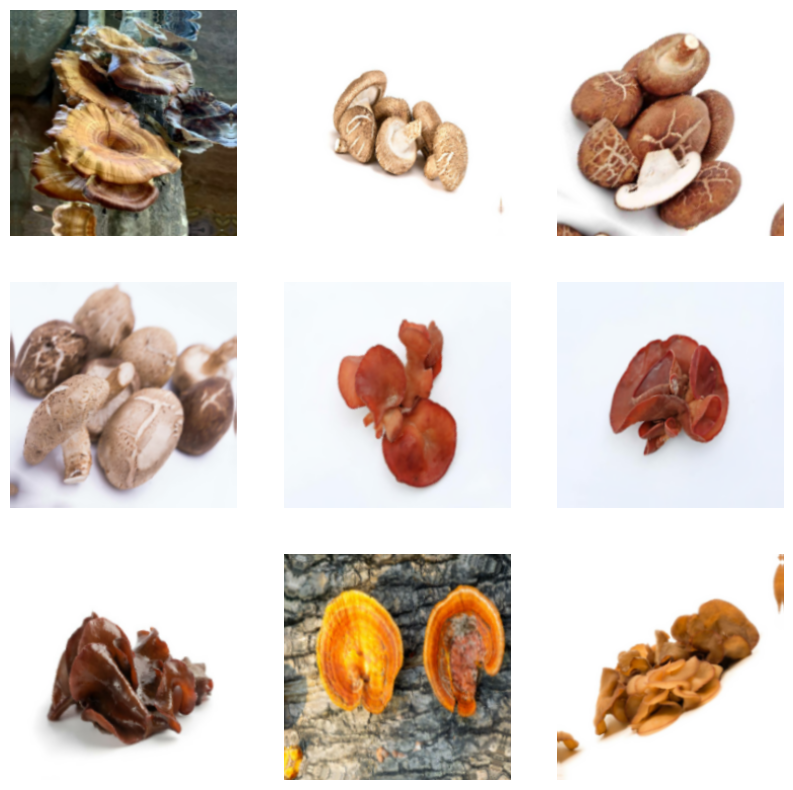

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

img_size = 224
batch = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
    subset="training",
    validation_split=0.2
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
    subset="validation",
    validation_split=0.2
)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

i = 0
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):  
    images = data_augmentation(images)  
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')
plt.show()

In [6]:
from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(224, 224, 3))

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), strides=2)(x)

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), strides=2)(x)

x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), strides=2)(x)

x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), strides=2)(x)

x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), strides=2)(x)

x = layers.Flatten()(x)

x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(4096, activation='relu')(x)

output_layer = layers.Dense(3, activation='softmax')(x)

model = models.Model(inputs=input_layer, outputs=output_layer)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,272,835 (512.21 MB)

 Trainable params: 134,272,835 (512.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)

history = model.fit(train_ds,
                    epochs=30,
                    validation_data=val_ds,
                    callbacks=[early_stopping])

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 125s 14s/step - accuracy: 0.3044 - loss: 565.2374 - val_accuracy: 0.5167 - val_loss: 1.0720
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 105s 13s/step - accuracy: 0.4164 - loss: 1.9042 - val_accuracy: 0.3500 - val_loss: 1.1041
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 100s 12s/step - accuracy: 0.2948 - loss: 1.1754 - val_accuracy: 0.3000 - val_loss: 1.0940
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 99s 12s/step - accuracy: 0.3489 - loss: 1.3574 - val_accuracy: 0.3500 - val_loss: 1.1020
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 100s 12s/step - accuracy: 0.3049 - loss: 1.0996 - val_accuracy: 0.5667 - val_loss: 1.0941
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 99s 12s/step - accuracy: 0.5840 - loss: 1.0850 - val_accuracy: 0.3167 - val_loss: 1.0194
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 103s 13s/step - accuracy: 0.4299 - loss: 1.0535 - val_accuracy: 0.3000 - val_loss: 3.0112
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 100s 12s/step - accuracy: 0.3782 - loss: 1.4493 - val_accuracy: 0.6167 - val_loss:

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save('BestModel_VGG-16_H2O.h5')

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model(r'D:\Kuliah\SEM 5\ml\UAS\UASSSSS\BestModel_VGG-16_H2O.h5')
class_names = ['JamurShitake', 'JamurReishi', 'JamurKuping']

def classify_and_save_image(image_path, save_path='predicted_image.jpg'):
    try:
        img = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img)  
        img_array = np.expand_dims(img_array, axis=0)

        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions[0])
        confidence = np.max(predictions[0]) * 100

        print(f"Prediksi: {class_names[predicted_class]}")
        print(f"Confidence: {confidence:.2f}%")

        img.save(save_path)

        return f"Prediksi: {class_names[predicted_class]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

result = classify_and_save_image(r'D:\Kuliah\SEM 5\ml\UAS\UASSSSS\datasetUASML\test_data\shitake\shitake (9).jpg', save_path='jamurShitake.jpg')
print(result)

In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\Kuliah\SEM 5\ml\UAS\UASSSSS\datasetUASML\test_data',
    labels='inferred',
    label_mode='categorical', 
    batch_size=32,
    image_size=(224, 224),
    shuffle=False 
)

class_names = ['JamurKuping', 'JamurReishi', 'JamurShitake']

y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))  
    y_pred.extend(np.argmax(predictions, axis=1)) 

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy = np.trace(cm) / np.sum(cm)

precision = np.diag(cm) / (np.sum(cm, axis=0) + 1e-6)
recall = np.diag(cm) / (np.sum(cm, axis=1) + 1e-6)
f1_score = 2 * (precision * recall) / (precision + recall + 1e-6)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)